$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 3 $$

# `01` Assignment 01
- Design your own `deep NN` to classify the `CIFAR 10` images (you can download from keras.dataset) into one of the 10 classes
- Investigate the use of different architectures (`different layers`, `learning rate`, `optimizers`, `loss function`)
- Note you will need to `flatten` the image and use it as your input vector

## `+` Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10,mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from keras.utils import set_random_seed

set_random_seed(99)

## `+` Load & Preprocess CIFAR 10 Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


### Preview the Images

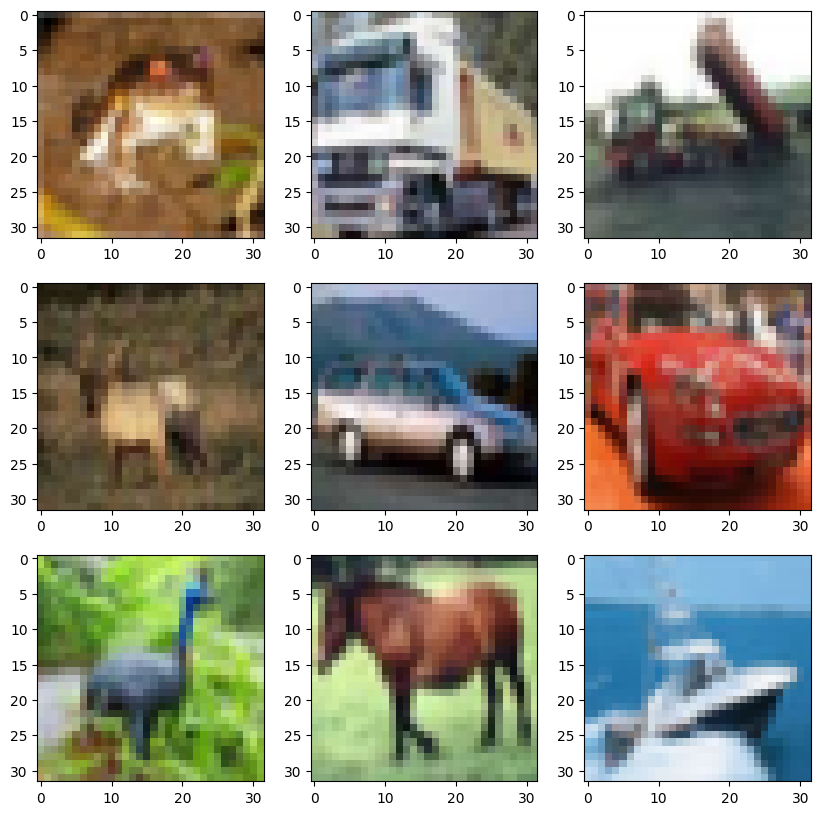

In [ ]:
# plot first few images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])

### Feature Rescaling

In [ ]:
# When working with deep learning models for image processing, we often rescale the pixel values by dividing them by 255
# 1. Normalization to a Common Scale
# 2. Better Numerical Stability
# 3. Improves Model Performance
# 4. Consistency Across Datasets
# Normalizing ensures that different datasets follow the same scale, making training more stable

# Rescale Input
X_train = X_train / 255
X_test  = X_test / 255

### OneHotEncode Target Variable

In [ ]:
# It is possible not to do this step and making the loss sparse_categorical_crossentropy
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

## `+` Set Global Parameters

In [ ]:
# Hyperparameters
BATCH_SIZE  = 64
NUM_CLASSES = 10
EPOCHS      = 50

## `i` Trial no. 1

### Model Training

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(NUM_CLASSES, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         


                                                                 
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 1746506 (6.66 MB)
Trainable params: 1746506 (6.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/50
782/782 [==============================] - 32s 38ms/step - loss: 1.8881 - accuracy: 0.3123 - val_loss: 1.7446 - val_accuracy: 0.3748
Epoch 2/50
782/782 [==============================] - 28s 35ms/step - loss: 1.6906 - accuracy: 0.3936 - val_loss: 1.6773 - val_accuracy: 0.3966
Epoch 3/50
782/782 [==============================] - 28s 36ms/step - loss: 1.5991 - accuracy: 0.4264 - val_loss: 1.5852 - val_accuracy: 0.4339
Epoch 4/50
782/782 [==============================] - 28s 35ms/step - loss: 1.5412 - accuracy: 0.4466 - val_loss: 1.5088 - val_accuracy: 0.4593
Epoch 5/50
782/782 [==============================] - 29s 37ms/step - loss: 1.4976 - accuracy: 0.4630 - val_loss: 1.5238 - val_accuracy: 0.4605
Epoch 6/50
782/782 [==============================] - 27s 35ms/step - loss: 1.4686 - accuracy: 0.4733 - val_loss: 1.5431 - val_accuracy: 0.4434
Epoch 7/50
782/782 [==============================] - 27s 35ms/step - loss: 1.4349 - accuracy: 0.4871 - val_loss: 1.4591 - val_accuracy:

### Model Evaluation

In [ ]:
# model Evaluation - Accuracy on Training and Testing Sets
print(f"Model accuracy on train set: {model.evaluate(X_train, y_train)[1]}")
print(f"Model accuracy on test set: {model.evaluate(X_test, y_test)[1]}")

1563/1563 [==============================] - 4s 2ms/step - loss: 0.7360 - accuracy: 0.7325
Model accuracy on train set: 0.7325000166893005
313/313 [==============================] - 1s 2ms/step - loss: 1.9489 - accuracy: 0.4907
Model accuracy on test set: 0.49070000648498535


### Result Visualization

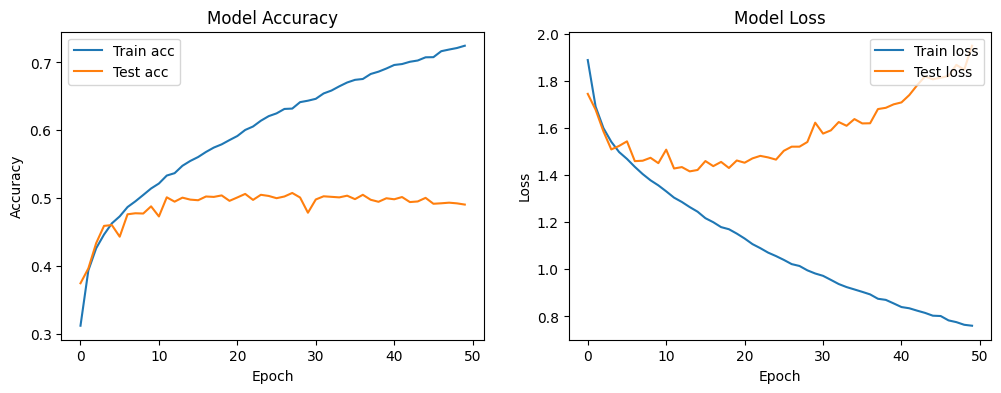

In [ ]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train acc', 'Test acc'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.show()

## `ii` Trial no. 2

### Model Training

<B>In this second Trial i will try different Loss function and a different optimizer with a learning rate with a minor modification on the model arc </B>

In [ ]:
# Run the Above cells without transforming it to one hot encoding >>  because we need to use sparse_categorical_crossentropy as a loss function

model = Sequential()

model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(NUM_CLASSES, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               1573376   
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 64)               

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/50
782/782 [==============================] - 16s 20ms/step - loss: 2.0079 - accuracy: 0.2615 - val_loss: 2.1890 - val_accuracy: 0.2387
Epoch 2/50
782/782 [==============================] - 16s 20ms/step - loss: 1.8062 - accuracy: 0.3459 - val_loss: 1.8271 - val_accuracy: 0.3220
Epoch 3/50
782/782 [==============================] - 15s 19ms/step - loss: 1.7143 - accuracy: 0.3855 - val_loss: 2.0323 - val_accuracy: 0.3073
Epoch 4/50
782/782 [==============================] - 15s 19ms/step - loss: 1.6475 - accuracy: 0.4098 - val_loss: 1.9540 - val_accuracy: 0.3367
Epoch 5/50
782/782 [==============================] - 16s 20ms/step - loss: 1.5961 - accuracy: 0.4296 - val_loss: 1.6900 - val_accuracy: 0.3951
Epoch 6/50
782/782 [==============================] - 16s 20ms/step - loss: 1.5572 - accuracy: 0.4436 - val_loss: 1.8645 - val_accuracy: 0.3844
Epoch 7/50
782/782 [==============================] - 16s 20ms/step - loss: 1.5230 - accuracy: 0.4560 - val_loss: 1.5613 - val_accuracy:

### Model Evaluation

In [ ]:
# model Evaluation - Accuracy on Training and Testing Sets
print(f"Model accuracy on train set: {model.evaluate(X_train, y_train)[1]}")
print(f"Model accuracy on test set: {model.evaluate(X_test, y_test)[1]}")

1563/1563 [==============================] - 5s 3ms/step - loss: 1.1824 - accuracy: 0.5726
Model accuracy on train set: 0.5725799798965454
313/313 [==============================] - 1s 4ms/step - loss: 1.8805 - accuracy: 0.4643
Model accuracy on test set: 0.4643000066280365


### Result Visualization

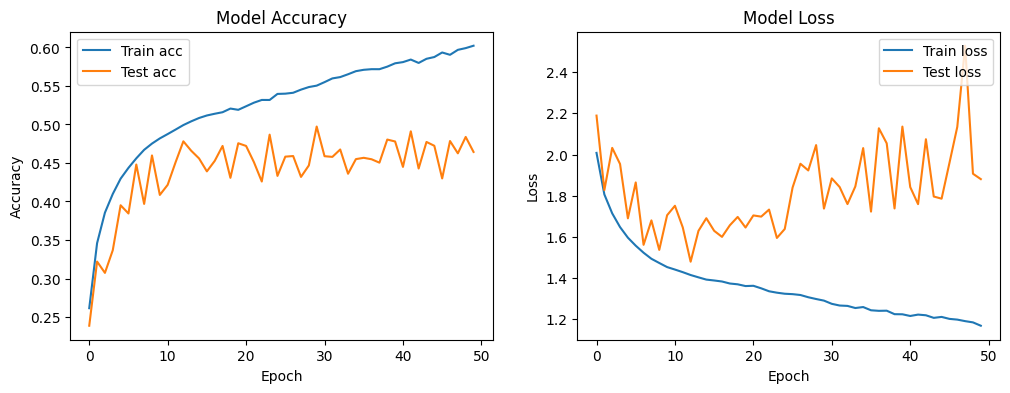

In [ ]:
# plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train acc', 'Test acc'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.show()

**Note:** Add more trials and explore different hyperparameters and design decisions.

------------------------------

> Add blockquote



# Assignment 02:
- Design your `deep convolutional neural network` to classify the `CIFAR 10` images into one of the 10 classes
- Use a pre-trained model to boost your network.
- Invistage the use of different architectures (different `layers`, `kernel sizes`, `pooling`, `learning rate`, `optimizers`, `loss function`)

You have to specify filters and kernel_size. These parameters have no default.

Default padding is valid, which means no zero-padding, and the default strides is (1,1).

$\frac{N - F + 2P}{S} + 1$

$P = \frac{F - 1}{2}$

## `i` Trial no. 1

### Model Training

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

In [ ]:
model = Sequential()

# Start with a lower number of filters
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout after pooling


model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout after pooling

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout after pooling

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))  # Dropout after pooling

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))  # Dropout after pooling
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 528,522 (2.02 MB)

 Trainable params: 528,522 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.2517 - loss: 1.9513 - val_accuracy: 0.5085 - val_loss: 1.3452
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4783 - loss: 1.4028 - val_accuracy: 0.5726 - val_loss: 1.1764
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5536 - loss: 1.2253 - val_accuracy: 0.6206 - val_loss: 1.0687
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6051 - loss: 1.1098 - val_accuracy: 0.6718 - val_loss: 0.9309
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6395 - loss: 1.0244 - val_accuracy: 0.6760 - val_loss: 0.9141
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6614 - loss: 0.9630 - val_accuracy: 0.6411 - val_loss: 1.0535
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6728 - loss: 0.9316 - val_accuracy: 0.6758 - val_loss: 0.9325
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6892 - loss: 0.8884 - val_accuracy: 

### Model Evaluation

In [ ]:
print("Accuracy on Training :",model.evaluate(X_train,y_train)[1])
print("Accuracy on Testing  :",model.evaluate(X_test,y_test)[1])

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9241 - loss: 0.2535
Accuracy on Training : 0.9228000044822693
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8048 - loss: 0.5873
Accuracy on Testing  : 0.8008999824523926


### Result Visualization

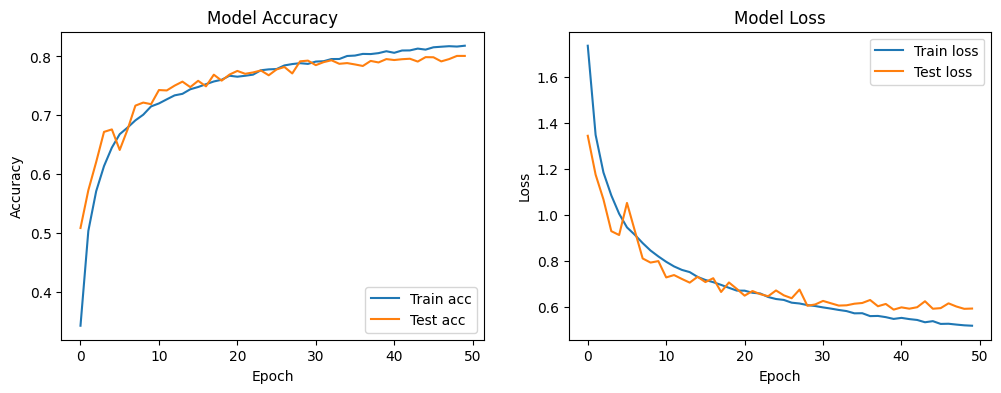

In [ ]:
# Plot the training accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train acc', 'Test acc'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.show()

## `ii` Trial no. 2

### Model Training

<b>Try Differenet Arc<B>

In [ ]:
# loss (sparse cross entropy )  -- differenet arc >> adding layers
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# Conv Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# Conv Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Conv Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Feature Extraction
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,117,322 (8.08 MB)

 Trainable params: 2,117,322 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Compile Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [ ]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.1614 - loss: 2.1912 - val_accuracy: 0.3315 - val_loss: 1.7833
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3311 - loss: 1.7653 - val_accuracy: 0.4547 - val_loss: 1.5034
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4124 - loss: 1.5583 - val_accuracy: 0.4985 - val_loss: 1.3738
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4660 - loss: 1.4417 - val_accuracy: 0.5329 - val_loss: 1.2835
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5080 - loss: 1.3478 - val_accuracy: 0.5761 - val_loss: 1.1789
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5431 - loss: 1.2567 - val_accuracy: 0.6083 - val_loss: 1.1013
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5691 - loss: 1.1884 - val_accuracy: 0.6299 - val_loss: 1.0448
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5994 - loss: 1.1247 - val_ac

### Model Evaluation

In [ ]:
print("Accuracy on Training :",model.evaluate(X_train,y_train)[1])
print("Accuracy on Testing  :",model.evaluate(X_test,y_test)[1])

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9766 - loss: 0.0869
Accuracy on Training : 0.9755399823188782
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8177 - loss: 0.5995
Accuracy on Testing  : 0.8166999816894531


### Result Visualization

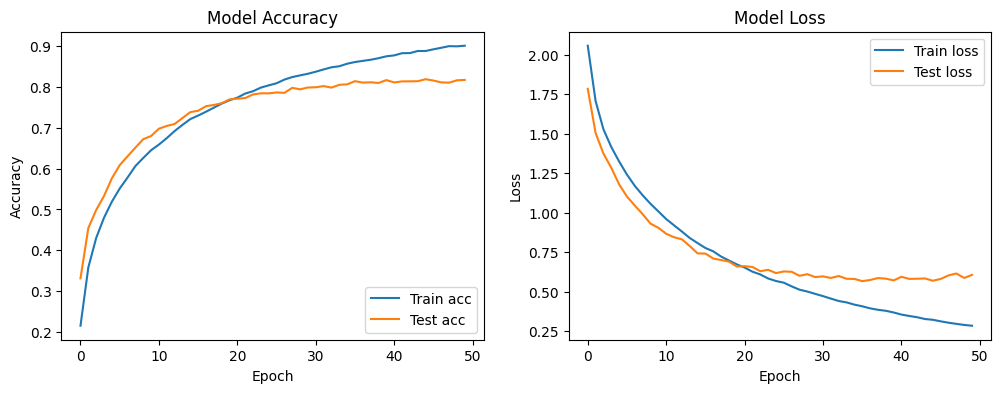

In [ ]:
# Plot the training accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train acc', 'Test acc'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.show()


---

# `03` Assignment 03 Transfer Learning
- Repeat Assignment 1 and 2 using MNIST dataset use transfer learning this time
- Note that you will need to convert the training labels into categorical using one hot encoding using `to_categorical()` function

In [1]:
# %pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout ,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

## `+` Load MNIST Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [4]:
#  Preprocess: Convert to 3 channels (MobileNetV2 requires 3 color channels)
X_train = tf.image.grayscale_to_rgb(tf.expand_dims(X_train, axis=-1))
X_test = tf.image.grayscale_to_rgb(tf.expand_dims(X_test, axis=-1))

In [5]:
#  Resize to 96x96 (MobileNetV2 default input size)
X_train = tf.image.resize(X_train, (96, 96))
X_test = tf.image.resize(X_test, (96, 96))

### Preview the Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


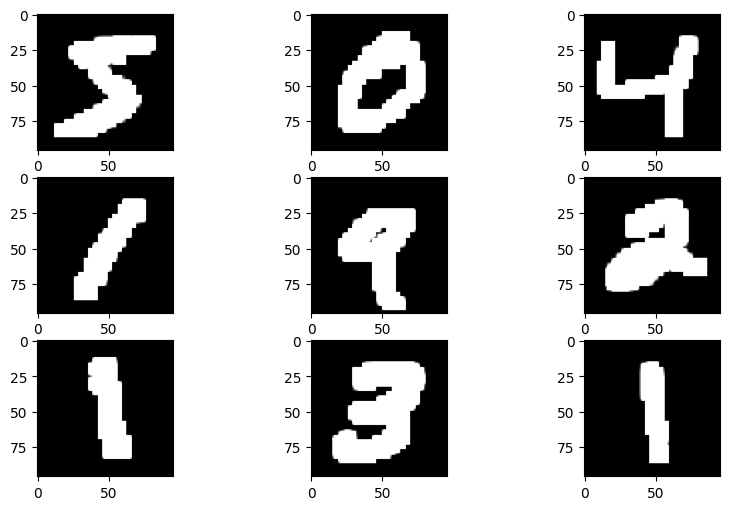

In [12]:
# plot first few images
plt.figure(figsize=(10,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')

### Rescale Independent Features

In [6]:
# Rescale the Input
X_train = X_train / 255
X_test = X_test / 255

## `+` Set Global Parameters

In [ ]:
# Hyperparameters
BATCH_SIZE  = 64
NUM_CLASSES = 10
EPOCHS      = 5

### Trial no. 1

#### Model Training

In [15]:
#  Load Pretrained MobileNetV2 (without top layer)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(96, 96, 3))

In [16]:
# Freeze the base model (so we don’t train it)
base_model.trainable = False

In [17]:
#  Add Custom Classification Head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation="relu")(x)
x = Dense(10, activation="softmax")(x)

In [18]:
#  Build Final Model
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [19]:
#  Train Model
history = model.fit(X_train, y_train, epochs=5, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/5
938/938 [==============================] - 202s 212ms/step - loss: 0.1622 - accuracy: 0.9480 - val_loss: 0.0938 - val_accuracy: 0.9674
Epoch 2/5
938/938 [==============================] - 5414s 6s/step - loss: 0.0821 - accuracy: 0.9730 - val_loss: 0.0900 - val_accuracy: 0.9706
Epoch 3/5
938/938 [==============================] - 223s 238ms/step - loss: 0.0638 - accuracy: 0.9786 - val_loss: 0.1051 - val_accuracy: 0.9666
Epoch 4/5
938/938 [==============================] - 213s 227ms/step - loss: 0.0543 - accuracy: 0.9818 - val_loss: 0.0900 - val_accuracy: 0.9720
Epoch 5/5
938/938 [==============================] - 205s 219ms/step - loss: 0.0437 - accuracy: 0.9852 - val_loss: 0.0850 - val_accuracy: 0.9723


#### Model Ealuation

In [20]:
print("Accuracy on Training :",model.evaluate(X_train,y_train)[1])
print("Accuracy on Testing  :",model.evaluate(X_test,y_test)[1])

1875/1875 [==============================] - 191s 102ms/step - loss: 0.0353 - accuracy: 0.9878
Accuracy on Training : 0.9878333210945129
313/313 [==============================] - 32s 104ms/step - loss: 0.0850 - accuracy: 0.9723
Accuracy on Testing  : 0.9722999930381775


#### Result Visualization

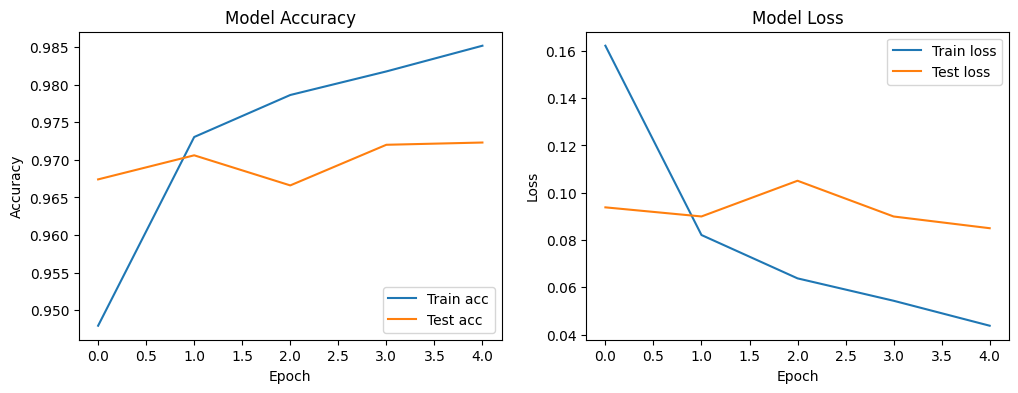

In [33]:
# Plot the training accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train acc', 'Test acc'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.show()

### Trial no. 2

#### Model Training

In [7]:
# Hyperparameters
BATCH_SIZE  = 128
NUM_CLASSES = 10
EPOCHS      = 15

In [8]:
#  Load Pretrained MobileNetV2 (without top layer)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(96, 96, 3))

In [9]:
# Freeze the base model (so we don’t train it)
base_model.trainable = False

#  Add Custom Classification Head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation="relu")(x)
x = Dense(10, activation="softmax")(x)

In [10]:
#  Build Final Model
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
#  Train Model
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/15
469/469 [==============================] - 201s 424ms/step - loss: 0.1815 - accuracy: 0.9430 - val_loss: 0.0993 - val_accuracy: 0.9663
Epoch 2/15
469/469 [==============================] - 198s 423ms/step - loss: 0.0827 - accuracy: 0.9729 - val_loss: 0.0904 - val_accuracy: 0.9699
Epoch 3/15
469/469 [==============================] - 197s 420ms/step - loss: 0.0666 - accuracy: 0.9777 - val_loss: 0.0813 - val_accuracy: 0.9714
Epoch 4/15
469/469 [==============================] - 193s 412ms/step - loss: 0.0537 - accuracy: 0.9821 - val_loss: 0.0747 - val_accuracy: 0.9761
Epoch 5/15
469/469 [==============================] - 576s 1s/step - loss: 0.0460 - accuracy: 0.9840 - val_loss: 0.1028 - val_accuracy: 0.9659
Epoch 6/15
469/469 [==============================] - 210s 448ms/step - loss: 0.0403 - accuracy: 0.9861 - val_loss: 0.0738 - val_accuracy: 0.9744
Epoch 7/15
469/469 [==============================] - 209s 447ms/step - loss: 0.0345 - accuracy: 0.9880 - val_loss: 0.0721 - va

#### Model Evaluation

In [13]:
print("Accuracy on Training :",model.evaluate(X_train,y_train)[1])
print("Accuracy on Testing  :",model.evaluate(X_test,y_test)[1])

1875/1875 [==============================] - 188s 100ms/step - loss: 0.0110 - accuracy: 0.9961
Accuracy on Training : 0.9960500001907349
313/313 [==============================] - 1587s 5s/step - loss: 0.0931 - accuracy: 0.9777
Accuracy on Testing  : 0.9776999950408936


#### Result Visualization

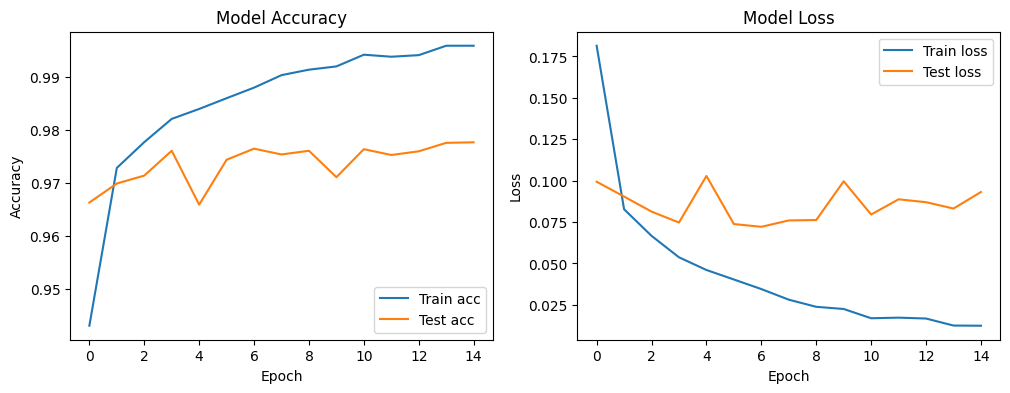

In [14]:
# Plot the training accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train acc', 'Test acc'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.show()